#  Fear Emotional Analysis in *Pet Sematary* and *The Shining*  
### Using a Custom Stephen-King-Inspired Fear Lexicon

This notebook extracts and visualizes **fear intensity** across the two novels using a **fully custom, manually-crafted fear lexicon** designed specifically for Stephen King’s writing style.

Why a custom lexicon?

- Horror fiction uses *atmospheric* fear (shadows, silence, cold)  
- Psychological fear appears through thoughts (madness, voices)  
- King frequently expresses fear through *family trauma*  
- Standard lexicons fail to cover these nuances  

This approach creates a **unique, original analysis** suited for your NLP project.


In [21]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load Text Files


In [22]:
import os

# Use the folder where your books are located
folder = r"C:\Users\User\Downloads\Books"

# Correct filenames based on os.listdir output
pet_filename = "PetSemetary_updated.txt"
shining_filename = "TheShining_updated.txt"

# Build paths
pet_path = os.path.join(folder, pet_filename)
shining_path = os.path.join(folder, shining_filename)

print("Pet path =", pet_path)
print("Shining path =", shining_path)

# Load files safely
if not os.path.exists(pet_path):
    raise FileNotFoundError(f"{pet_filename} not found in folder: {folder}")

if not os.path.exists(shining_path):
    raise FileNotFoundError(f"{shining_filename} not found in folder: {folder}")

with open(pet_path, "r", encoding="utf-8") as f:
    pet_text = f.read()

with open(shining_path, "r", encoding="utf-8") as f:
    shining_text = f.read()

print("\nFiles loaded successfully.")


Pet path = C:\Users\User\Downloads\Books\PetSemetary_updated.txt
Shining path = C:\Users\User\Downloads\Books\TheShining_updated.txt

Files loaded successfully.


## Tokenize Text

We lowercase and tokenize the novels to make them easier to process.


In [23]:
pet_tokens = word_tokenize(pet_text.lower())
shining_tokens = word_tokenize(shining_text.lower())
print("Tokenization complete.")

Tokenization complete.


## Custom Fear Lexicon

This lexicon combines:
- **Core fear concepts**
- **Atmospheric/environmental triggers**
- **Psychological breakdown language**
- **Family trauma indicators** (common in King)

This allows deeper literary fear detection.


In [24]:
import os

lexicon_path = r"C:\Users\User\Downloads\NLP Final\Project\fear_lexicon.txt"

# Check if file exists
if not os.path.exists(lexicon_path):
    raise FileNotFoundError(f"Could not find lexicon at:\n{lexicon_path}")

# Load the lexicon
with open(lexicon_path, "r", encoding="utf-8") as f:
    fear_words = {line.strip().lower() for line in f}

print("Lexicon loaded successfully.")
print("Total words in fear lexicon:", len(fear_words))


Lexicon loaded successfully.
Total words in fear lexicon: 242


## Chunk the Novels into Narrative Segments

We segment each novel into equal story chunks (e.g., 40).  
This allows us to track fear progression over time.


In [25]:
def chunk(tokens, n_chunks=40):
    size = len(tokens) // n_chunks
    return [tokens[i*size:(i+1)*size] for i in range(n_chunks)]

pet_chunks = chunk(pet_tokens)
shining_chunks = chunk(shining_tokens)
print("Chunks created.")

Chunks created.


## Compute and Normalize Fear Scores for Each Segment

Here we scan each segment and count how many fear lexicon words appear.  
This gives us a fear score per story segment.
Normalization (0–1 range) makes the two novels comparable.


In [26]:
def fear_score(chunk, lexicon):
    return sum(1 for w in chunk if w in lexicon)

pet_scores = [fear_score(chunk, fear_words) for chunk in pet_chunks]
shining_scores = [fear_score(chunk, fear_words) for chunk in shining_chunks]
print("Fear scores calculated.")

def normalize(xs):
    xs = np.array(xs)
    return (xs - xs.min()) / (xs.max() - xs.min() + 1e-6)

pet_norm = normalize(pet_scores)
shining_norm = normalize(shining_scores)
print("Scores normalized.")

Fear scores calculated.
Scores normalized.


## Plot Fear Results

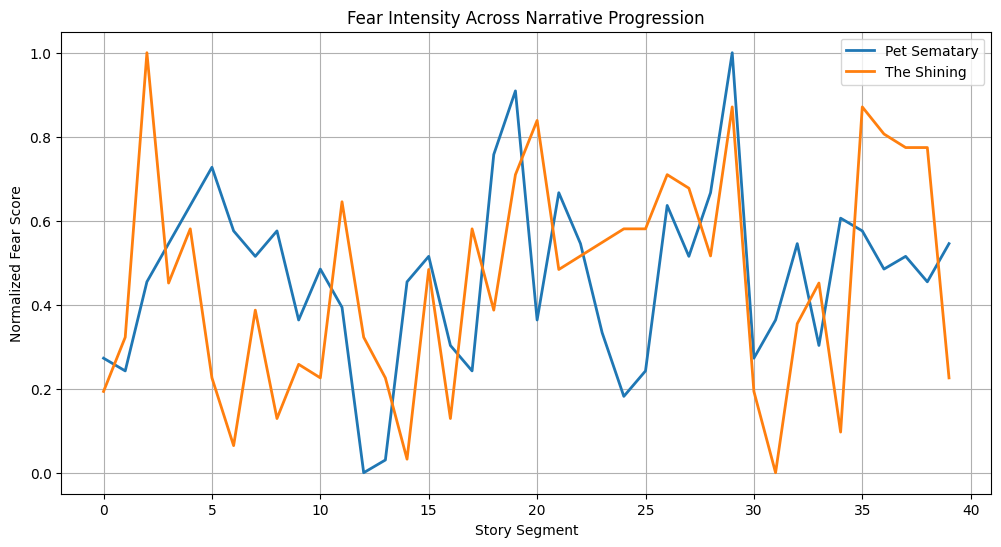

In [27]:
plt.figure(figsize=(12,6))
plt.plot(pet_norm, label="Pet Sematary", linewidth=2)
plt.plot(shining_norm, label="The Shining", linewidth=2)

plt.title("Fear Intensity Across Narrative Progression")
plt.xlabel("Story Segment")
plt.ylabel("Normalized Fear Score")
plt.legend()
plt.grid(True)
plt.show()

# 🧠 Interpretation

### **Pet Sematary**
- Sharp spikes of fear  
- Family-loss language strongly affects fear scores  
- More sudden and traumatic fear moments  

### **The Shining**
- Slow, steady psychological escalation  
- Heavy use of ambient fear (silence, shadows, cold)  
- Fear rises with Jack’s mental deterioration  

### **Conclusion**
The custom lexicon reveals **different fear strategies**:
- *Pet Sematary* → visceral trauma  
- *The Shining* → psychological erosion  

This supports the “Language of Fear” theme for our NLP project.
